<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/1.c.%20Linear%20Reg_Abalone_Predict%20Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os 
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression


In [3]:
col_names=['sex', 'length', 'diameter', 'height', 'wweight', 'sweight', 'vweight', 'shweight', 'rings']
df = pd.read_csv('/content/drive/MyDrive/csv/abalone.csv', names=col_names, header=None)

In [4]:
df.head()

,sex,length,diameter,height,wweight,sweight,vweight,shweight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [8]:
df.isna().sum()

sex         0
length      0
diameter    0
height      0
wweight     0
sweight     0
vweight     0
shweight    0
rings       0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


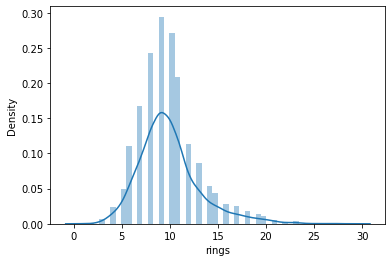

In [7]:
sns.distplot(df.rings)

In [12]:
df.shape

(4177, 9)

In [36]:
#change the sex into numerical/categorical value for analysis.
df['sex']=df.sex.map({'F':0, 'M':1, 'I':2})

In [37]:
df

,sex,length,diameter,height,wweight,sweight,vweight,shweight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


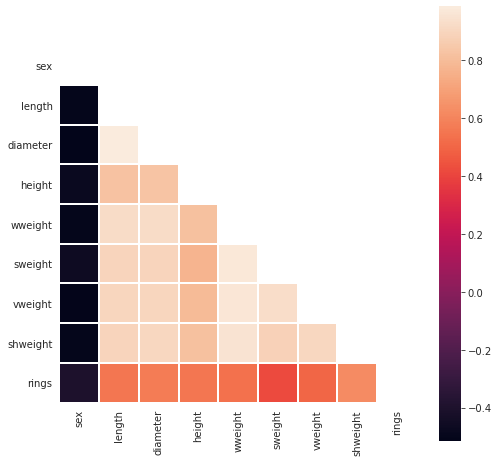

In [39]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8)

In [40]:
corrmat=df.corr()
corrmat

,sex,length,diameter,height,wweight,sweight,vweight,shweight,rings
sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
wweight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
sweight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
vweight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shweight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


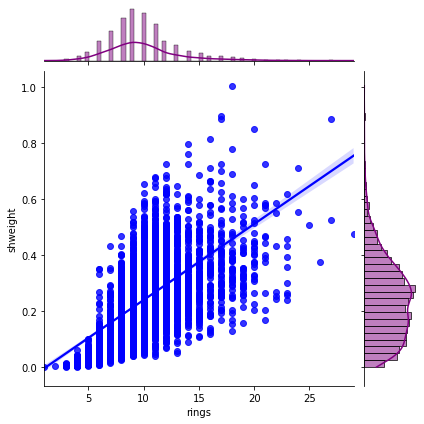

In [41]:
sns.jointplot(x=df['rings'],y=df['shweight'], joint_kws={'color':'blue'}, marginal_kws={'color':'purple'}, kind="reg")

In [42]:
from scipy import stats
corr= stats.pearsonr(x=df['shweight'],y=df['rings'])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.0
cor:		 0.6275740445103218


In [47]:
#Split Value as a Target value and drop river since there was little or no impact to value.
target = df.rings
df2 = df.drop(['rings', 'sex'], axis = 1)
#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(836, 7) (3341, 7)
(836,) (3341,)


In [63]:
y_train

3423    11
2782     8
1567     8
4109     8
2854    11
        ..
1852     8
937      7
446     13
123      6
2602     8
Name: rings, Length: 3341, dtype: int64

In [49]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.4829515293706047
RMSE : 2.349425532301738


Based on the linear regression i ran, the size of the abalone's body is not a good predictor for guessing the age of the abalone.  